In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 

print("Reading data...")
train_file = "train_users_2.csv"
df_train = pd.read_csv(train_file, header = 0,index_col=None)
df_train.head()

Populating the interactive namespace from numpy and matplotlib
Reading data...


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:

test_file = "test_users.csv"
df_test = pd.read_csv(test_file, header = 0,index_col=None)
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [5]:
# Combining into one dataset for cleaning
df_all = pd.concat((df_train, df_test))
print("Reading data...completed")
df_all.head()

Reading data...completed


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [6]:

# Fixing date formats in Pandas - to_datetime
## Change dates to specific format
print("Fixing timestamps...")
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'], format='%Y-%m-%d')
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')
print("Fixing timestamps...completed")

Fixing timestamps...
Fixing timestamps...completed


In [6]:
len(df_all.index)

275547

In [7]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [8]:

## Removing date_first_booking column
df_all.drop('date_first_booking', axis = 1, inplace = True)
print("Droped date_first_booking column...")

df_all.head()

Droped date_first_booking column...


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [10]:
import numpy as np

## Remove outliers function - [1]
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [11]:
## Fixing age column - [2]
print("Fixing age column...")
df_all = remove_outliers(df = df_all, column = 'age', min_val = 15, max_val = 90)
df_all['age'].fillna(-1, inplace = True)
print("Fixing age column...completed")

Fixing age column...
Fixing age column...completed


/home/abhinav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  
/home/abhinav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  


In [12]:
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [12]:

# Other column missing value - Fill first_affiliate_tracked column
print("Filling first_affiliate_tracked column...")
df_all['first_affiliate_tracked'].fillna(-1, inplace=True)
print("Filling first_affiliate_tracked column...completed")

df_all.head()

Filling first_affiliate_tracked column...
Filling first_affiliate_tracked column...completed


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


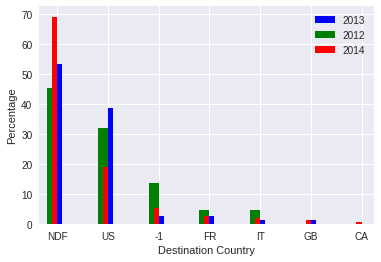

22
75


In [29]:
#graph of date_account_created in years 2012,2013,2014 Vs country_destination
users_2013 = sum(df_all.loc[df_all['date_account_created'] == pd.to_datetime(2013, format='%Y'),'country_destination'].value_counts())
users_2014 = sum(df_all.loc[df_all['date_account_created'] == pd.to_datetime(2014, format='%Y'),'country_destination'].value_counts())
users_2012 = sum(df_all.loc[df_all['date_account_created'] == pd.to_datetime(2012, format='%Y'),'country_destination'].value_counts())

u2013 = df_all.loc[df_all['date_account_created'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() / users_2013 * 100
u2014= df_all.loc[df_all['date_account_created'] == pd.to_datetime(2014, format='%Y'), 'country_destination'].value_counts() /users_2014 * 100
u2012= df_all.loc[df_all['date_account_created'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() /users_2012 * 100

u2013.plot(kind='bar', width=0.1, color='blue', position=0, label='2013', rot=0)
u2012.plot(kind='bar', width=0.2, color='green', position=1, label='2012', rot=0)
u2014.plot(kind='bar', width=0.1, color='red', position=1, label='2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sb.despine()
plt.show()
print(users_2012)
print(users_2013)


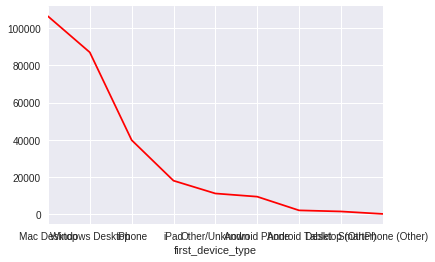

In [23]:
import seaborn as sb
df_all.first_device_type.value_counts(dropna=False).plot(kind='line', color='red', rot=0)
plt.xlabel('first_device_type')
sb.despine()

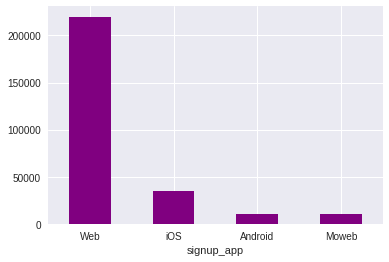

In [15]:
df_all.signup_app.value_counts(dropna=False).plot(kind='bar', color='purple', rot=0)
plt.xlabel('signup_app')
sb.despine()

In [17]:
import numpy as np
col_values=df_all['gender'].values
df_all['gender']=np.where(df_all['gender']=="-unknown-",np.NaN,col_values)
df_all['gender'].fillna(-1,inplace=True)
df_all.head()


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [18]:
import numpy as np
col_values=df_all['country_destination'].values
df_all['country_destination']=np.where(df_all['country_destination']=="other",np.NaN,col_values)
df_all['country_destination'].fillna(-1,inplace=True)
df_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-1,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,-1,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-1,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


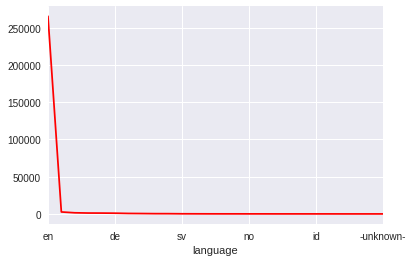

In [20]:
df_all.language.value_counts(dropna=False).plot(kind='line', color='red', rot=0)
plt.xlabel('language')
sb.despine()